<a href="https://colab.research.google.com/github/MegabyteVoyager/ML-problems/blob/main/Placement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/placement.csv')
print(df.head(6))

   Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0
5           5   7.1   48.0          1


In [3]:
# Plan

# Preprocess + EDA + feature engg & selection
# Extract i/p and o/p cols
# Scale the values
# Train-test split
# Evaluate the model/ model selection
# Deploy the model

In [4]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(5)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [5]:
df.shape

(100, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


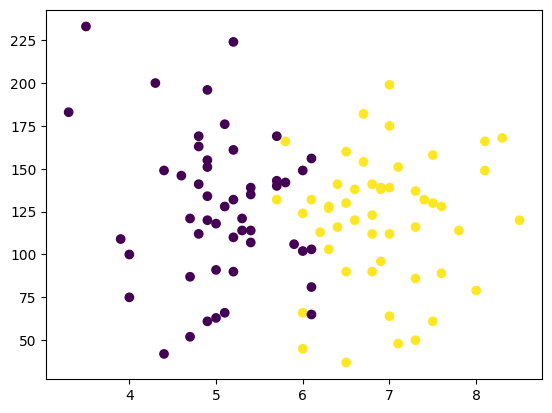

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

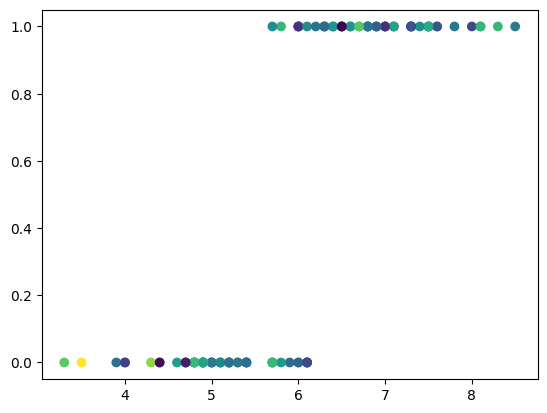

In [8]:
plt.scatter(x=df['cgpa'], y=df['placement'], c=df['iq'])

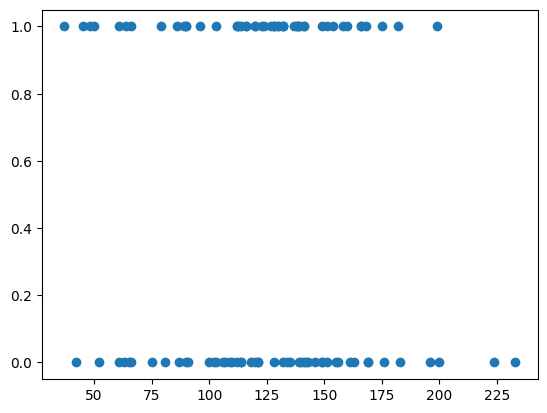

In [9]:
plt.scatter(df['iq'], df['placement'])

In [10]:
X = df.iloc[:, :-1]
y=df.iloc[:,-1]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [11]:
# train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
print(X_train)

[[ 0.04574698 -1.39623723]
 [-0.72024904 -1.39623723]
 [ 0.556411   -0.06678058]
 [-1.6564664  -0.55917193]
 [-0.89047038 -1.51933507]
 [-0.63513837  0.22865423]
 [-0.80535971 -0.78074804]
 [ 0.98196435  0.69642602]
 [ 0.30107899  0.1055564 ]
 [-1.06069172 -0.87922631]
 [ 0.64152167  1.45963262]
 [ 1.15218569 -0.90384588]
 [ 0.89685368 -0.26373712]
 [-0.80535971 -0.11601971]
 [ 0.98196435 -1.83938945]
 [ 0.47130033 -2.11020469]
 [-0.63513837 -0.80536761]
 [ 0.72663234  0.45023034]
 [ 0.30107899  0.13017596]
 [ 0.81174301 -0.6576502 ]
 [ 1.32240703 -1.51933507]
 [-2.08201975  2.71523057]
 [ 1.74796037 -1.07618285]
 [ 1.57773903 -0.21449798]
 [-1.31602373 -1.98710686]
 [ 0.04574698  0.03169769]
 [-1.14580239  0.57332818]
 [-0.89047038 -0.06678058]
 [-0.89047038  1.80430657]
 [ 0.13085765  0.22865423]
 [-0.46491703 -0.21449798]
 [ 0.556411    0.37637164]
 [-0.63513837  0.9426217 ]
 [ 0.47130033 -0.80536761]
 [ 0.89685368  1.28729564]
 [-0.63513837  2.49365446]
 [ 0.38618966  0.45023034]
 

In [13]:
X_test = scalar.fit_transform(X_test)
print(X_test)

[[ 0.65965874 -0.1130444 ]
 [-0.28271089 -0.58755175]
 [-0.17800315 -0.69920054]
 [-1.32978826  0.78014592]
 [ 2.02085932  0.61267273]
 [ 0.03141232 -0.39216637]
 [-0.07329542 -1.28535669]
 [ 0.34553553  0.9197069 ]
 [-0.91095731 -0.16886879]
 [-0.49212636  1.17091668]
 [ 0.76436648  0.33355076]
 [ 0.86907421  2.0082826 ]
 [ 2.43969026 -0.19678099]
 [-0.17800315  0.61267273]
 [-1.43449599  0.38937515]
 [-0.38741863  0.41728735]
 [-1.01566505 -0.47590297]
 [-1.22508052 -1.78777624]
 [-0.17800315 -2.29019579]
 [ 0.554951    0.75223372]]


In [14]:
from sklearn.linear_model import LogisticRegression

lo_reg = LogisticRegression()
lo_reg.fit(X_train, y_train)


LogisticRegression()

In [15]:
y_pred = lo_reg.predict(X_test)
print(y_pred)
print(y_test)

[1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1]
0     1
1     0
62    0
76    0
37    1
99    1
78    0
38    1
2     0
84    0
60    1
26    1
69    1
33    0
51    0
4     0
92    0
7     0
10    1
74    1
Name: placement, dtype: int64


In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

print("Mean Squared Error: ",mse(y_test,y_pred))
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Mean Squared Error:  0.05
Accuracy Score:  0.95


In [17]:
# Cross Validation
from sklearn.model_selection import cross_val_score

neg_mse_scores = cross_val_score(lo_reg, X, y,scoring='neg_mean_squared_error', cv=10)
rmse_scores= np.sqrt(-neg_mse_scores)

def print_score(scores):
  print("Mean: ",np.mean(scores))
  print("Standard Deviation: ",np.std(scores))

print_score(rmse_scores)

Mean:  0.2606551850567226
Standard Deviation:  0.17904992181803855


In [18]:
accuracy_scores = cross_val_score(lo_reg, X, y, scoring="accuracy", cv=10)
print_score(accuracy_scores)

Mean:  0.9
Standard Deviation:  0.07745966692414831


<Axes: >

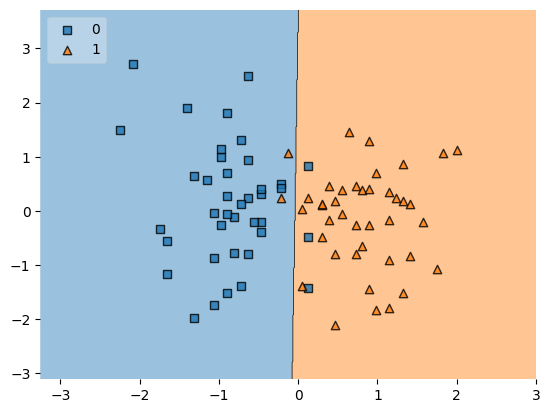

In [19]:
from mlxtend.plotting import plot_decision_regions
# Plotting decision regions
plot_decision_regions(X_train, y_train.values, clf=lo_reg, legend=2)


In [20]:
import pickle

In [21]:
pickle.dump(lo_reg,open('model_placement.pkl','wb'))

In [23]:
# Try SVM
from sklearn import svm
clf=svm.SVC()

clf.fit(X_train,y_train)


SVC()

In [24]:
y_pred_svm = clf.predict(X_test)

In [26]:
y_pred_svm
print(accuracy_score(y_test, y_pred_svm))
print(mse(y_test, y_pred_svm))

1.0
0.0


In [28]:
svm_neg_mse_scores = cross_val_score(clf, X, y, scoring='neg_mean_squared_error', cv=10)
print(svm_neg_mse_scores)

[-0.5 -0.5 -0.3 -0.5 -0.5 -0.4 -0.5 -0.5 -0.5 -0.5]


In [29]:
rmse= np.sqrt(-svm_neg_mse_scores)
print_score(rmse)

Mean:  0.6837032339031224
Standard Deviation:  0.05049641522338544


In [30]:
svm_accuracy_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print_score(svm_accuracy_scores)

Mean:  0.53
Standard Deviation:  0.06403124237432847


<Axes: >

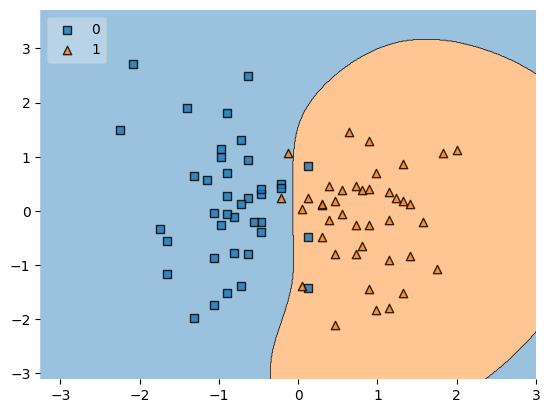

In [31]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)